# Comparing variable and fixed interest rates for Kenny and O

Currently comparing for 36 months

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# basic imports
import calc_tools as ct
import numpy as np

## Some basic comparisons

Paying down 520746 in balance, on a 30 year loan, so 25 years left.

In [3]:
balance = 520746
fixed_rate = 5.6
amort = 25

In [4]:
monthly_fixed = ct.calculate_payment(balance, fixed_rate, amort)
print(monthly_fixed)

3208.97


Compare to variable rate payments, which has a much higher interest rate-- also 25 year amortization period remaining.

In [5]:
monthly_variable = ct.calculate_payment(balance, 6.35, amort, variable = True)
print(monthly_variable)

3467.46


Potential extra payments per month should be the difference here:

In [6]:
extra = ct.generate_flat(monthly_variable - monthly_fixed, months = 36)
print(extra[0])

258.49000000000024


Let's calculate a few scenarios out now:

1) Fixed rate 
2) Fixed rate, with extra payments
3) Variable rate (if things stay fixed to 6.35)

In [8]:
variable_base = ct.generate_flat(6.35)
fixed = ct.generate_flat(fixed_rate)

In [9]:
output_fixed = ct.calculate_monthly_amortization(balance, fixed, amort, 3, variable = False)
output_fixed_extra = ct.calculate_monthly_amortization(balance, fixed, amort, 3, extra_payments = extra)
output_variable = ct.calculate_monthly_amortization(balance, variable_base, amort, 5, variable = True)

Magic! The hard part is done. Let's do some comparisons now. 

First do a quick slimming down to 36 months for the variable for plotting.

In [10]:
output_variable_reduced = {}
for key in output_variable:
    output_variable_reduced[key] = output_variable[key][:36]

In [12]:
basic_comparison = [output_fixed, output_fixed_extra, output_variable_reduced]
basic_labels = ['Fixed 5.6', 'Fixed 5.6 with Extra', 'Variable 6.35']

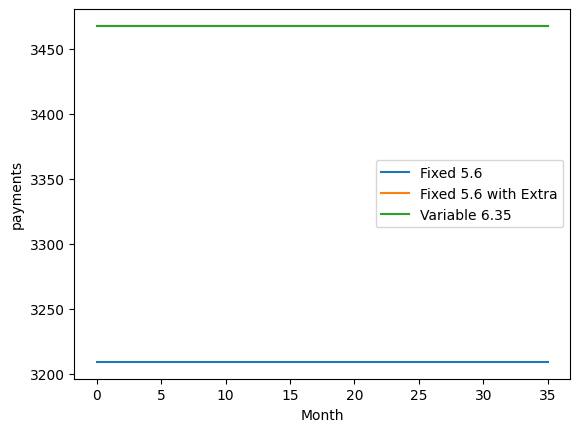

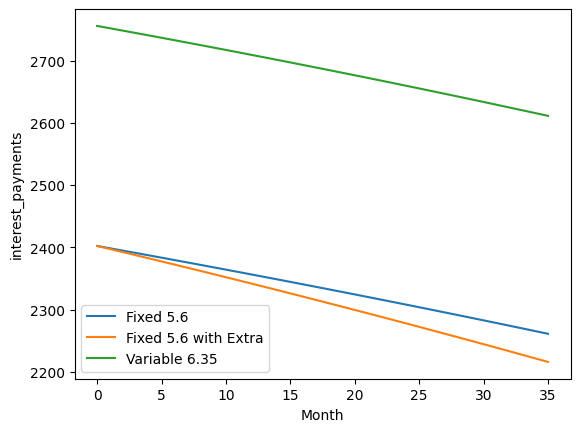

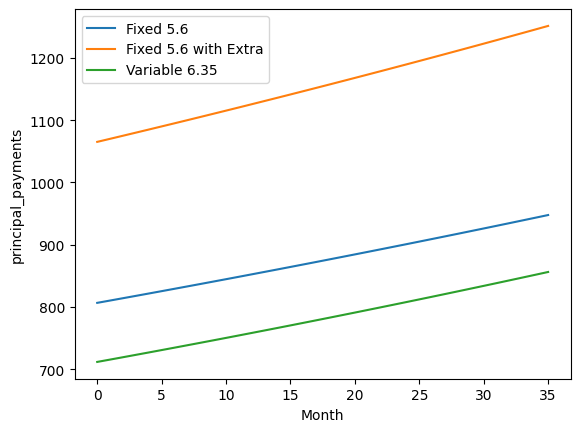

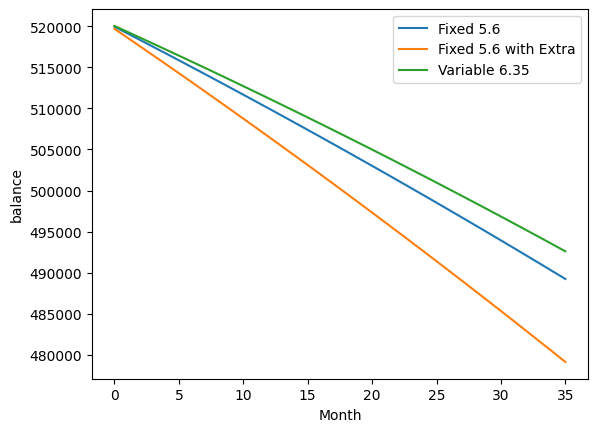

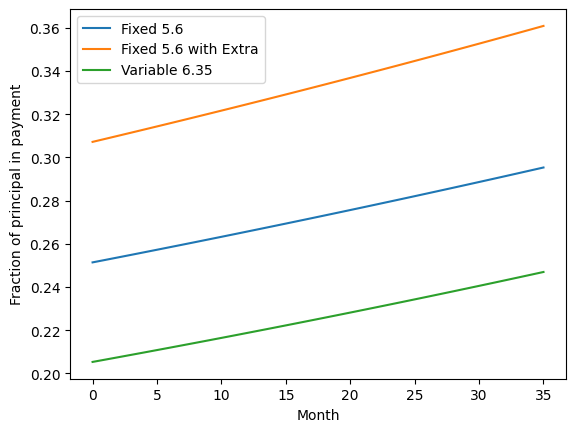

In [13]:
ct.make_plots_vs_time(basic_comparison, basic_labels)

For Fixed 5.6, your final balance is 489232.98. You paid 84009.9 in interest and 31513.02 in principal, for a principal fraction of 0.273

For Fixed 5.6 with Extra, your final balance is 479135.35. You paid 83217.91 in interest and 41610.65 in principal, for a principal fraction of 0.333

For Variable 6.35, your final balance is 492597.66. You paid 96680.22 in interest and 28148.34 in principal, for a principal fraction of 0.225

Out of the above choices, Fixed 5.6 with Extra has the best final balance, at 479135.35. This gives 13462.31 of savings compared to the worst scenario, Variable 6.35.


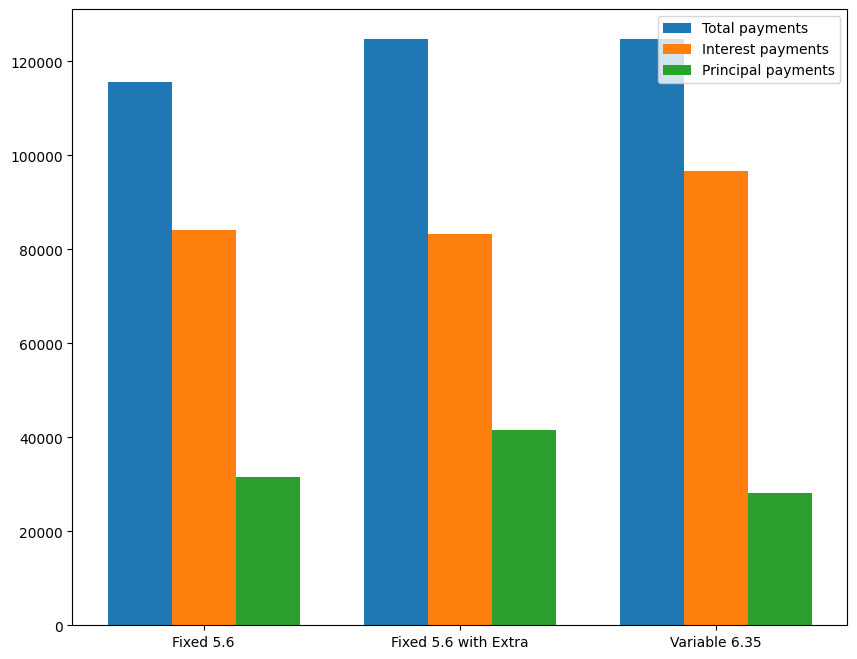

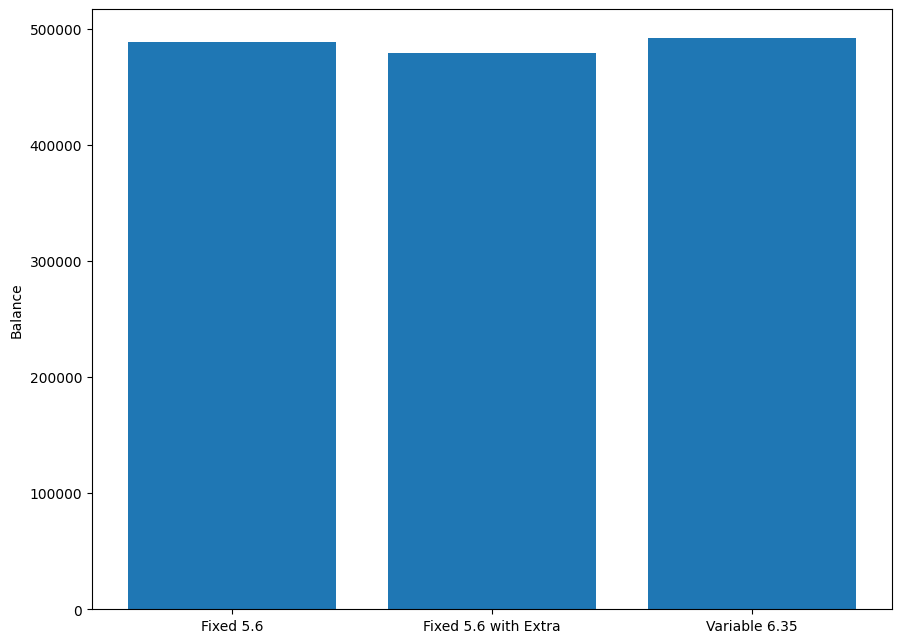

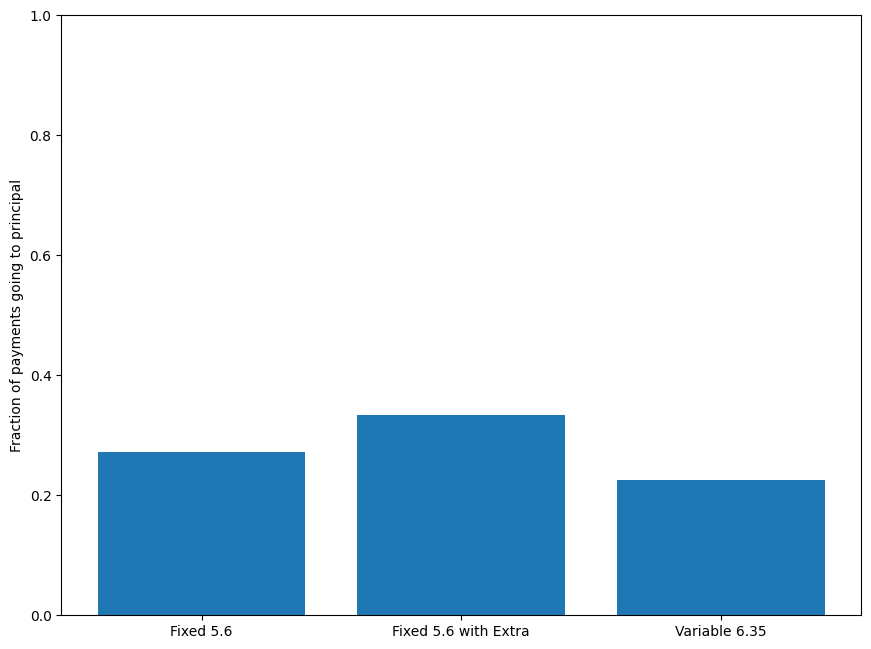

In [14]:
ct.make_summary(basic_comparison, basic_labels)

This isn't a really serious comparison-- in reality the variable will almost certainly be decreasing over time. Let's see what that looks like.

## More complicated scenarios

Perch option is the one from https://myperch.io/canada-interest-rate-forecast/#:~:text=The%20Bank%20of%20Canada%20is,before%20the%20end%20of%202023

Wowa is from https://wowa.ca/interest-rate-forecast

In [15]:
perch = [5.66, 6.09, 5.62, 5.2, 4.75, 4.31, 4.27, 3.96, 4.15, 3.95] + np.ones(10) * 0.69
perch_rates = np.concatenate([ct.generate_flat(perch_rate, 6) for perch_rate in perch])
print(perch)
print(perch_rates)
# 2023-06-30	5.66%
# 2023-12-31	6.09%
# 2024-06-30	5.62%
# 2024-12-31	5.20%
# 2025-06-30	4.75%
# 2025-12-31	4.31%
# 2026-06-30	4.27%
# 2026-12-31	3.96%
# 2027-06-30	4.15%
# 2027-12-31	3.95%
# 2028-06-30	4.28%
# 2028-12-31	4.19%

[6.35 6.78 6.31 5.89 5.44 5.   4.96 4.65 4.84 4.64]
[6.35 6.35 6.35 6.35 6.35 6.35 6.78 6.78 6.78 6.78 6.78 6.78 6.31 6.31
 6.31 6.31 6.31 6.31 5.89 5.89 5.89 5.89 5.89 5.89 5.44 5.44 5.44 5.44
 5.44 5.44 5.   5.   5.   5.   5.   5.   4.96 4.96 4.96 4.96 4.96 4.96
 4.65 4.65 4.65 4.65 4.65 4.65 4.84 4.84 4.84 4.84 4.84 4.84 4.64 4.64
 4.64 4.64 4.64 4.64]


In [16]:
wowa = [6.7, 7.1, 7.1, 5.95, 5.95, 4.95, 4.45, 4.45, 4.45, 4.45] - np.ones(10) * 0.35
wowa_rates = np.concatenate([ct.generate_flat(wowa_rate, 6) for wowa_rate in wowa])
print(wowa)
print(wowa_rates)

[6.35 6.75 6.75 5.6  5.6  4.6  4.1  4.1  4.1  4.1 ]
[6.35 6.35 6.35 6.35 6.35 6.35 6.75 6.75 6.75 6.75 6.75 6.75 6.75 6.75
 6.75 6.75 6.75 6.75 5.6  5.6  5.6  5.6  5.6  5.6  5.6  5.6  5.6  5.6
 5.6  5.6  4.6  4.6  4.6  4.6  4.6  4.6  4.1  4.1  4.1  4.1  4.1  4.1
 4.1  4.1  4.1  4.1  4.1  4.1  4.1  4.1  4.1  4.1  4.1  4.1  4.1  4.1
 4.1  4.1  4.1  4.1 ]


Let's plot these to make sure they look sensible

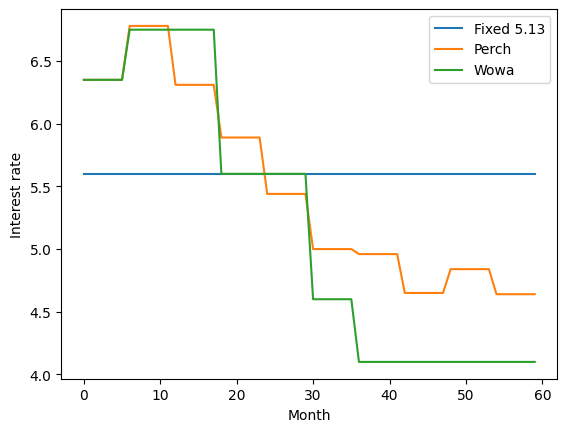

In [17]:
ct.plot_vs_time([fixed, perch_rates, wowa_rates], ['Fixed 5.13', 'Perch', 'Wowa'], ylabel='Interest rate')

Ok, all set. For the plot above I just made the 5.13 extend for 60 months, but in reality that number applies only to three years. So we'll do all our comparisons for the end of three years. So let's do some comparisons calculations. 

In [18]:
output_perch = ct.calculate_monthly_amortization(balance, perch_rates, amort, 5, variable = True)
output_perch_reduced = ct.reduce_output(output_perch, 36)
output_wowa = ct.calculate_monthly_amortization(balance, wowa_rates, amort, 5, variable = True)
output_wowa_reduced = ct.reduce_output(output_wowa, 36)

In [20]:
advanced_comparison = [output_fixed, output_fixed_extra, output_perch_reduced, output_wowa_reduced]
advanced_labels = ['Fixed 5.6', 'Fixed 5.6 w/ Extra', 'Perch', 'Wowa']

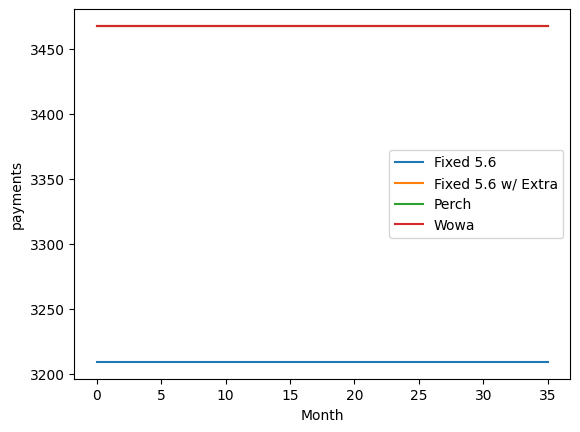

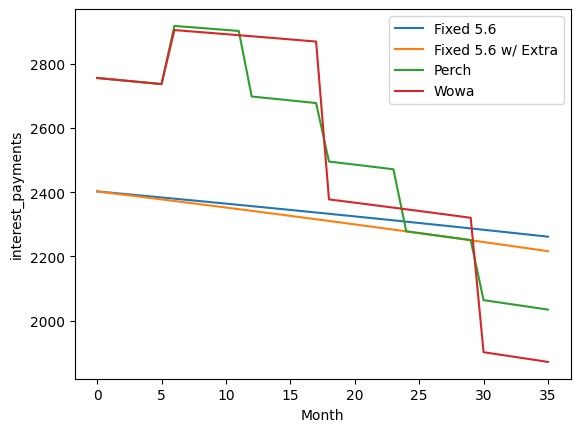

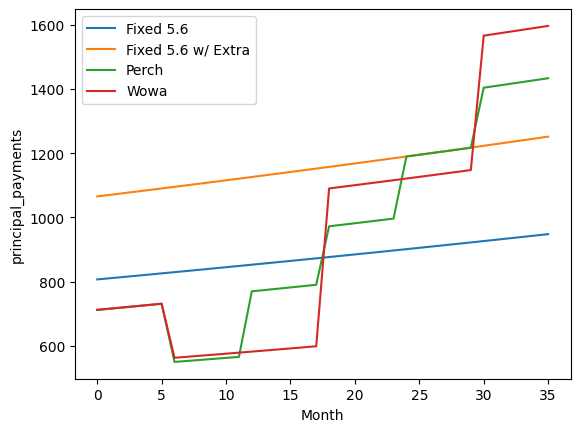

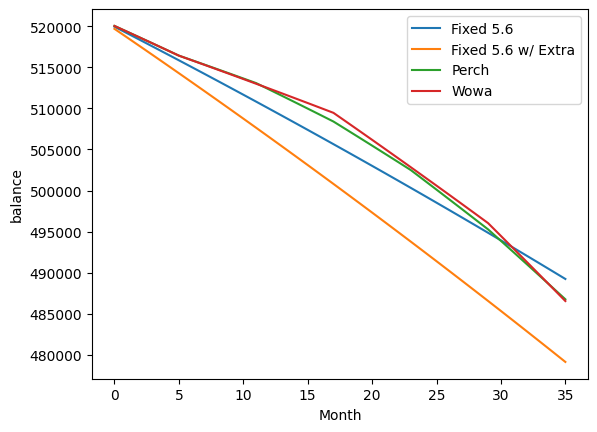

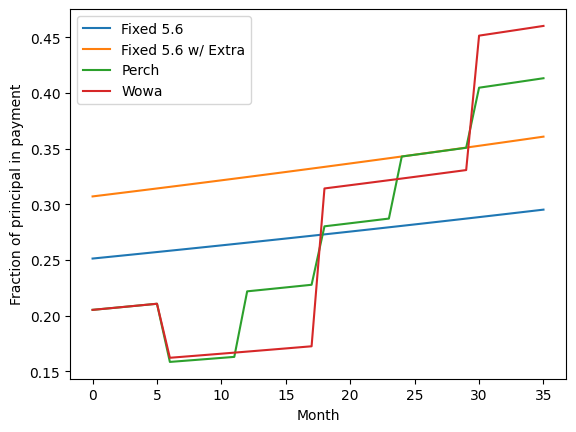

For Fixed 5.6, your final balance is 489232.98. You paid 84009.9 in interest and 31513.02 in principal, for a principal fraction of 0.273

For Fixed 5.6 w/ Extra, your final balance is 479135.35. You paid 83217.91 in interest and 41610.65 in principal, for a principal fraction of 0.333

For Perch, your final balance is 486760.23. You paid 90842.79 in interest and 33985.77 in principal, for a principal fraction of 0.272

For Wowa, your final balance is 486546.24. You paid 90628.8 in interest and 34199.76 in principal, for a principal fraction of 0.274

Out of the above choices, Fixed 5.6 w/ Extra has the best final balance, at 479135.35. This gives 10097.63 of savings compared to the worst scenario, Fixed 5.6.


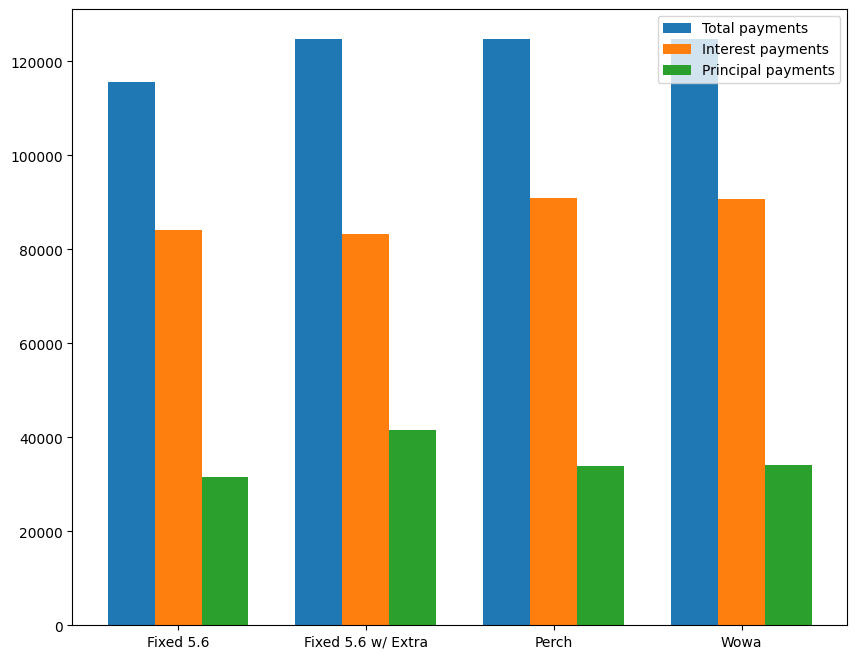

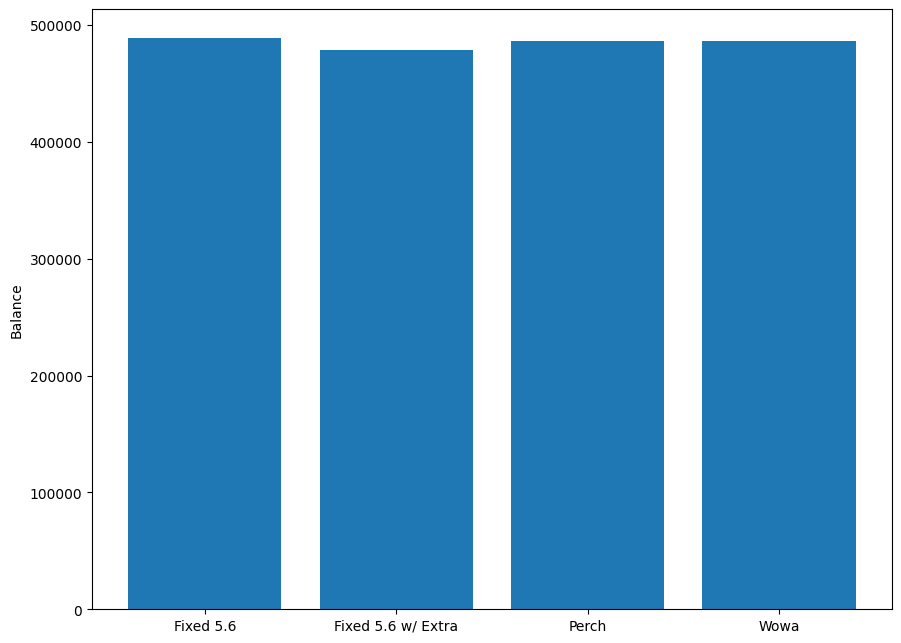

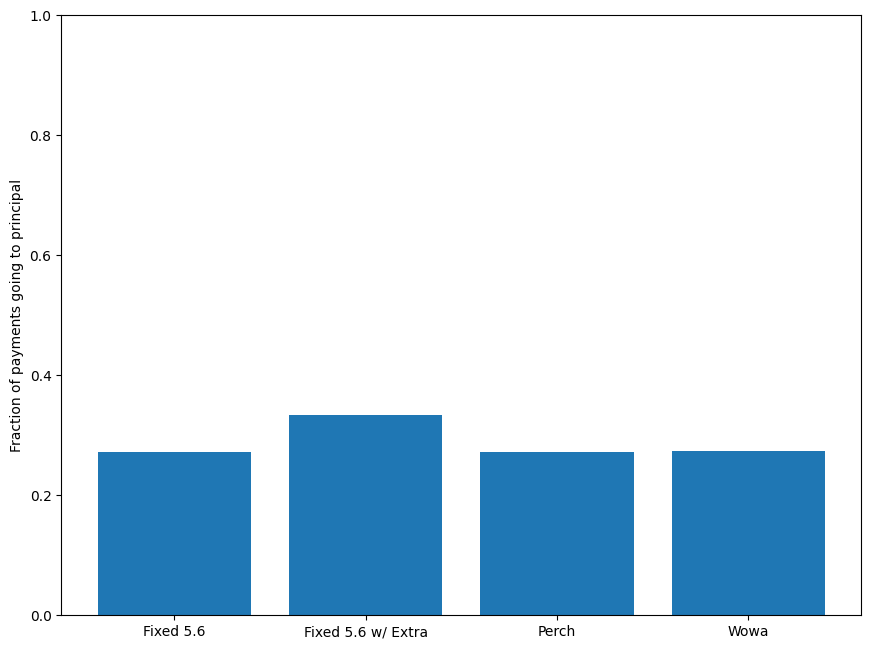

In [21]:
ct.make_plots_vs_time(advanced_comparison, advanced_labels)
ct.make_summary(advanced_comparison, advanced_labels)

Keep in mind, for the "Fixed 5.13" without extra payments, you are keeping an extra 400 * 36 = 14400 in pocket. But note that there is about a 1000 difference in amount of interest paid-- you save 1k in interest if you pay the extra in principal (which is also obviously reducing the balance).

When I compare the Fixed 5.13 to the Perch and Wowa, the biggest thing I see is that they all pay down roughly the same amount in principle-- 33k. The difference is in the interest you are paying. The difference in the montly cost (400 a month) goes entirely into interest (which doesn't get you anything). Another way to think about this is that the 14400 above can go towards principle (if you do the "extra payments"), into your pocket (if you do the basic 5.13), or into the bank's hands (with the variable interest rate options).

The story is a bit more complicated because of the 36 months vs 60 month terms. If you get me a five-year term loan I can calculate that as well. It's quite possible that the variable will look more attractive if we include more time on it. On the other hand, that depends a little on what the five-year rate is. (For what it's worth, the Wowa website is predicting 5 year rates to be ~3.3% in 3 years time... but that's a huge, huge guess).

When the fixed rate goes up to 5.6%, the difference goes down to about 7500-- still in favor of fixed!